In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [366]:

import os
path = os.getcwd() + '/data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,16.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


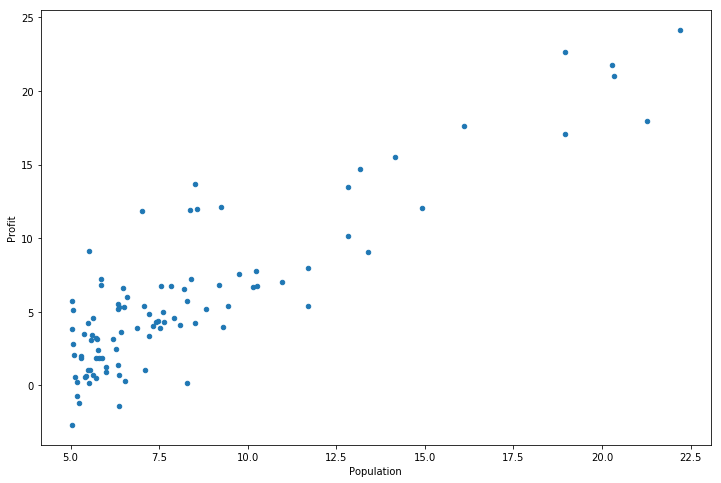

In [367]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

##  Cost function
\begin{align*}
J(\theta_0, \theta_1) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left ( \hat{y}_{i}- y_{i} \right)^2 = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (x_{i}) - y_{i} \right)^2
\end{align*}

In [368]:
def computeCost (X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [369]:
data.insert(0, 'ones', 1)


In [370]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [371]:
X.head()

,ones,Population
0,1,16.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [372]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [373]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [374]:
theta.ravel().shape

(1, 2)

In [375]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [376]:
computeCost(X,y, theta)

32.072733877455676

In [377]:
# X data
# t target
# theta hypotesis
# alpha learning rate
# iters how many train.
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost


In [378]:
alpha = 0.01
iters = 1000

In [379]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.58314768,  1.15583129]])

In [380]:
computeCost(X, y, g)

3.4942377322554243

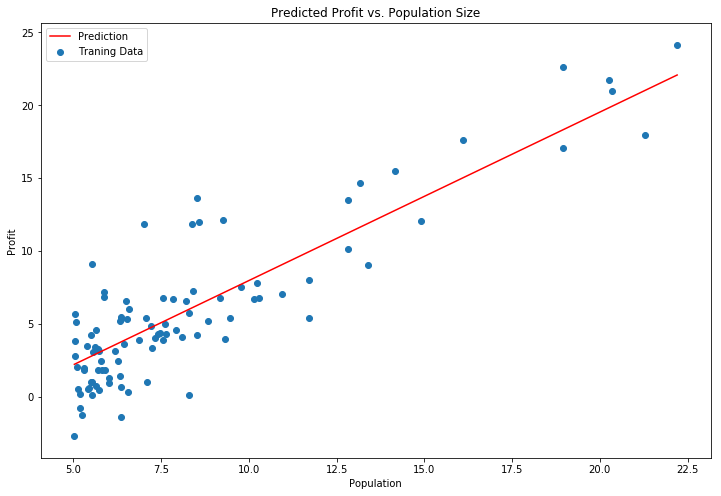

In [381]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

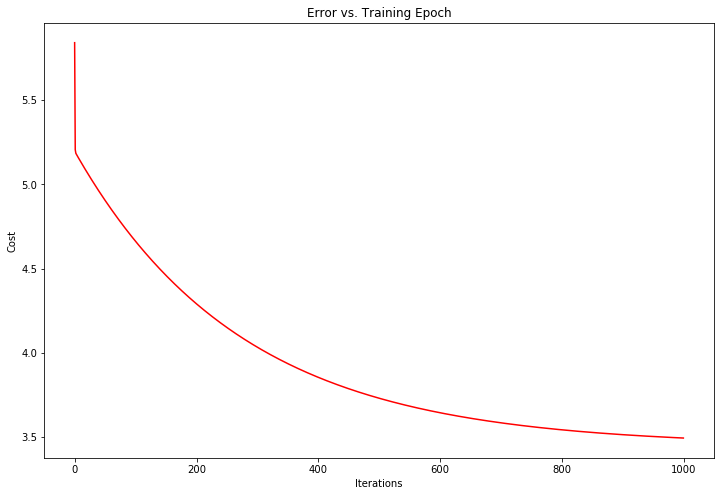

In [382]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

## Linear regression with multiple variables 

In [383]:
path = os.getcwd() + '/data/ex1data2.txt'
data2 =  pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [384]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [385]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [386]:
# add ones column
data2.insert(0, 'Ones', 1)

In [387]:
data2.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [388]:
# set X (training Data ) y targetPrice
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert them to matrix 
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)
g2

matrix([[ -1.04077503e-16,   8.78503652e-01,  -4.69166570e-02]])

In [389]:
computeCost(X2, y2, g2)

0.13070336960771892

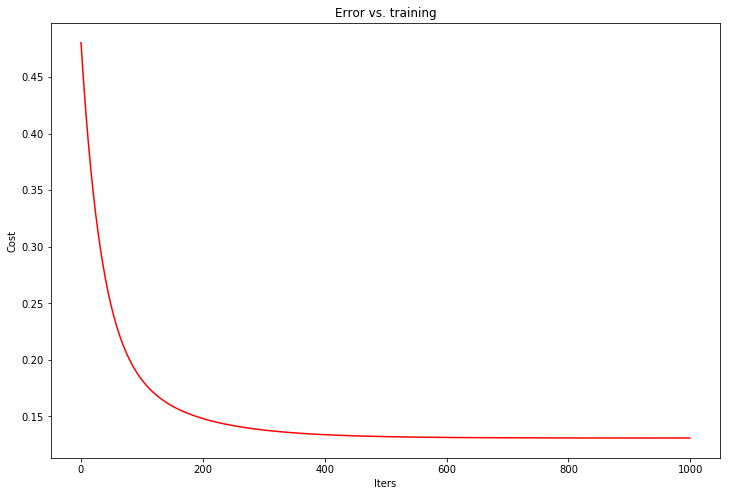

In [390]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iters')
ax.set_ylabel('Cost')
ax.set_title('Error vs. training')

In [391]:
# lazzy way of doing it :)

from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

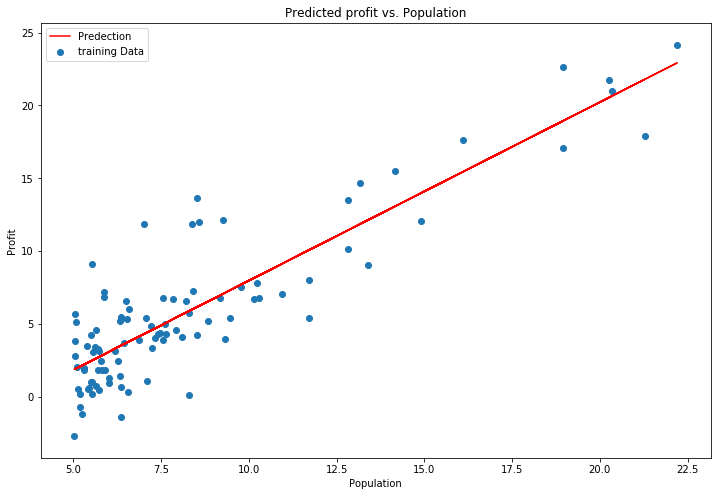

In [392]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Predection')
ax.scatter(data.Population, data.Profit, label='training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted profit vs. Population')